In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the data.
df= pd.read_csv('SouthGermanCredit.asc',sep=' ')

In [ ]:
df.shape

(1000, 21)

In [ ]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
# Changing the Columns Name.
columns =['status','duration','credit_history','purpose','amount','savings','employment_duration',
          'installment_rate','personal_status_sex','other_debtors','present_residence','property',
          'age','other_installment_plans','housing','number_credits','job','people_liable','telephone',
          'foreign_worker','credit_risk']
df.columns = columns
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

# Replacing the numerical values with original values in all categorical columns..

In [ ]:
status = {1:'no checking account', 2:'less than 0 DM', 3:'0 to 200 DM', 4:'200 DM or more'}
df['status'] = df['status'].map(status)

credit_history = {0 : 'delay in paying off in the past',
 1 : 'critical account/other credits elsewhere',
 2 : 'no credits taken/all credits paid back duly',
 3 : 'existing credits paid back duly till now',
 4 : 'all credits at this bank paid back duly'}
df['credit_history'] = df['credit_history'].map(credit_history)

purpose = {0 : 'others', 1 : 'car (new)', 2 : 'car (used)',3 : 'furniture/equipment', 4 : 'radio/television',
           5 : 'domestic appliances', 6 : 'repairs', 7 : 'education', 8 : 'vacation', 9 : 'retraining', 10 : 'business'}
df['purpose'] = df['purpose'].map(purpose)

savings = {1:'unknown/no savings account', 2 :'less than 100 DM', 3:'100 to 500 DM', 4 :'500 to 1000 DM', 5:'1000 DM or more'}
df['savings'] = df['savings'].map(savings)

employment_duration = {1 : 'unemployed',2 : 'less than 1 year', 3 : '1 to 4 yrs', 4 : '4 to 7 yrs', 5 : '7 yrs or more'}
df['employment_duration'] = df['employment_duration'].map(employment_duration)

installment_rate = {1 : '35 or more', 2 : '25 to 35', 3 : '20 to 25', 4 : 'less than 20'}
df['installment_rate'] = df['installment_rate'].map(installment_rate)

personal_status_sex = {1 : 'male : divorced/separated', 2 : 'female : non-single or male : single', 3 : 'male : married/widowed', 4 : 'female : single'}
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_sex)

other_debtors = {1 : 'none', 2 : 'co-applicant', 3 : 'guarantor'}
df['other_debtors'] = df['other_debtors'].map(other_debtors)

present_residence = {1 : 'less than 1 year', 2 : '1 to 4 yrs', 3 : '4 to 7 yrs', 4 : '7 yrs or more'}
df['present_residence'] = df['present_residence'].map(present_residence)

property = {1 : 'unknown/no property', 2 : 'car or other',3 : 'building soc. savings agr./life insurance', 4 : 'real estate'}
df['property'] = df['property'].map(property)

other_installment_options = {1 : 'bank',2 : 'stores',3 : 'none'}
df['other_installment_plans'] = df['other_installment_plans'].map(other_installment_options)

housing = {1:'for free', 2:'rent', 3:'own'}
df['housing'] = df['housing'].map(housing)

job={1 : 'unemployed/unskilled - non-resident',2 : 'unskilled-resident',3 : 'skilled employee/official',4 : 'manager/self-employed/highly qualified employee'}
df['job'] = df['job'].map(job)

number_credits = {1 : '1',2 : '2-3', 3 : '4-5',4 : '6 or more'}
df['number_credits'] = df['number_credits'].map(number_credits)

people_liable = {1 : '3 or more', 2 : '0 to 2'}
df['people_liable'] = df['people_liable'].map(people_liable)

telephone = {1 : 'no',2 : 'yes (under customer name)'}
df['telephone'] = df['telephone'].map(telephone)

foreign_worker = {1 : 'yes', 2 : 'no'}
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
# checking for the Null values..
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,less than 1 year,less than 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 to 4 yrs,25 to 35,male : married/widowed,none,...,unknown/no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,1
2,less than 0 DM,12,no credits taken/all credits paid back duly,retraining,841,less than 100 DM,4 to 7 yrs,25 to 35,female : non-single or male : single,none,...,unknown/no property,23,none,for free,1,unskilled-resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 to 4 yrs,20 to 25,male : married/widowed,none,...,unknown/no property,39,none,for free,2-3,unskilled-resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 to 4 yrs,less than 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled-resident,0 to 2,no,yes,1


In [ ]:
df["credit_risk"].unique()

array([1, 0])

<Axes: >

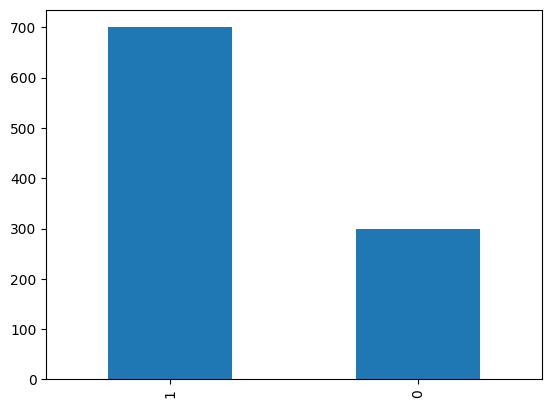

In [ ]:
#Making countPlot for the Credit Risk
#sns.countplot(df['credit_risk'])
df['credit_risk'].value_counts().plot(kind="bar")

 70% of the total records have good credit risk and 30% of records have bad credit risk.

In [ ]:
df.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                 int64
dtype: object

In [ ]:
categorical_columns=df.columns[df.dtypes=="object"]
numerical_columns=df.columns[df.dtypes!="object"].drop('credit_risk')

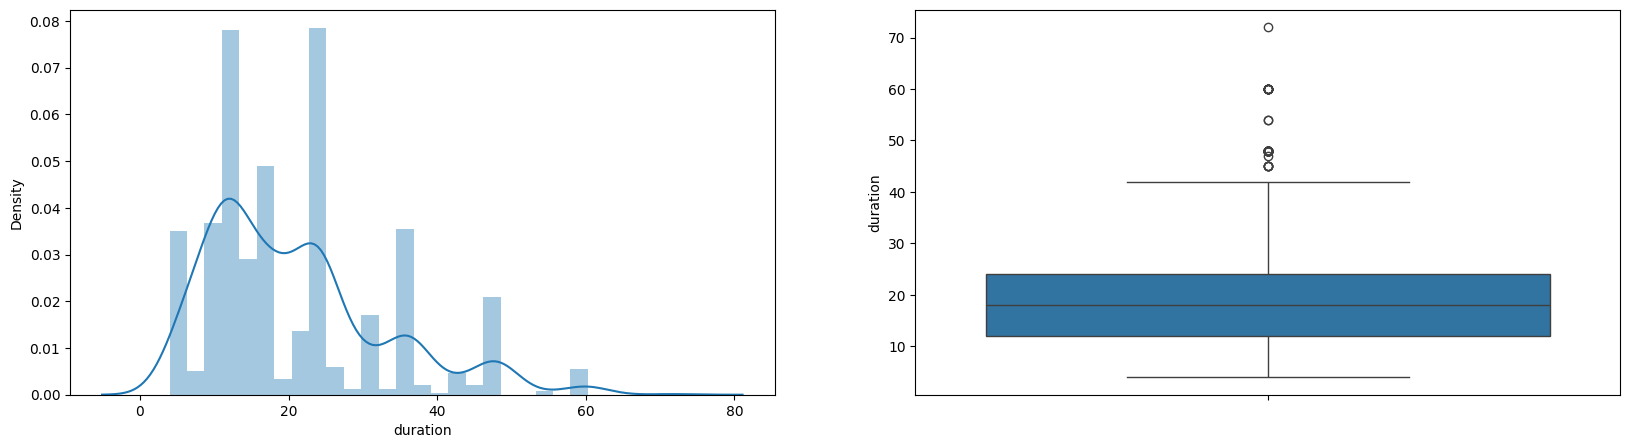

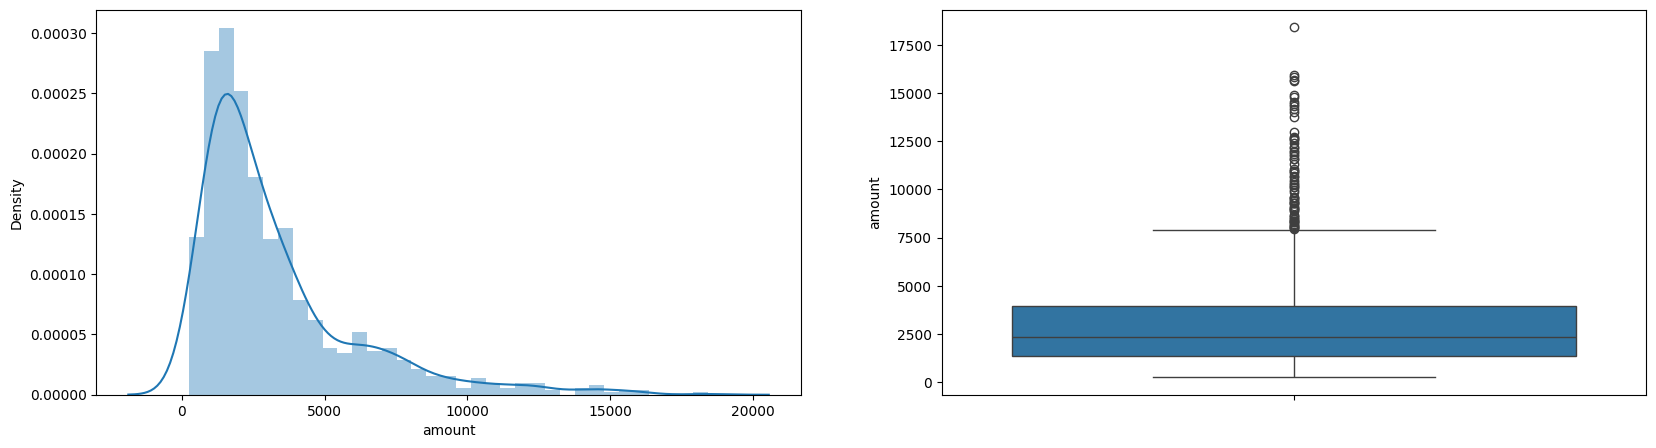

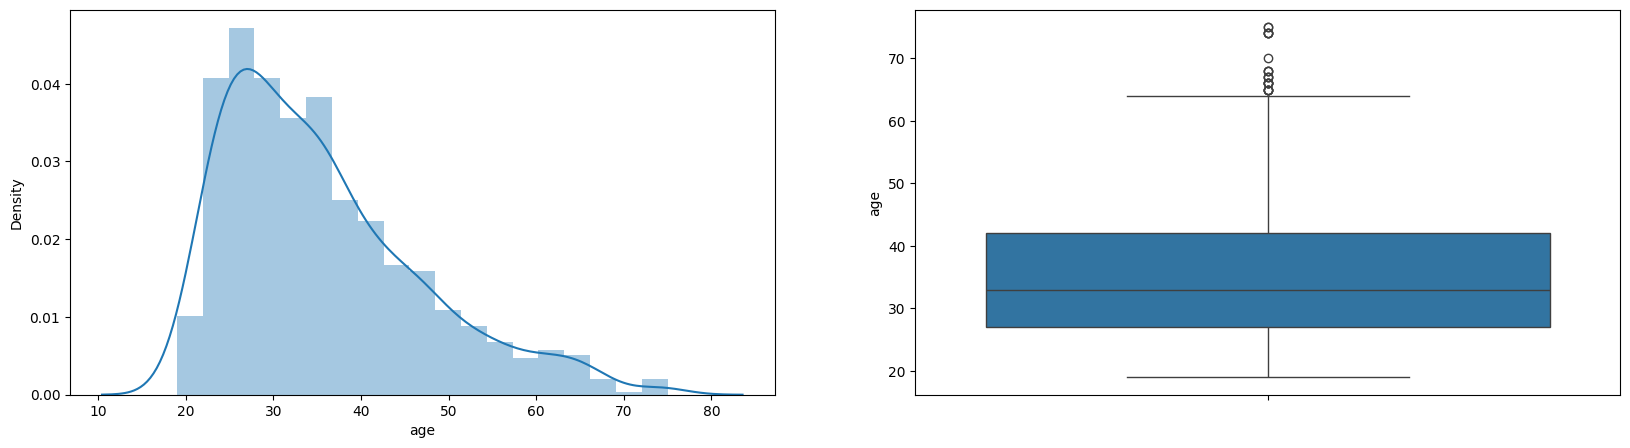

In [ ]:
#visualize the numerical features of our dataset
for columns in numerical_columns :
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    sns.distplot(df[columns],ax=ax[0])
    sns.boxplot(df[columns],ax=ax[1])


# Inferences from the graph

Only few outliers in 'duration' column.
Data is right skewed.


Lot of outliers in 'amount' column.
Data is highly right skewed.


Some outliers in 'age' column.
Data is slightly right skewed.

# Now, let's visualize the categorical features of our dataset

In [ ]:
len(categorical_columns)

17

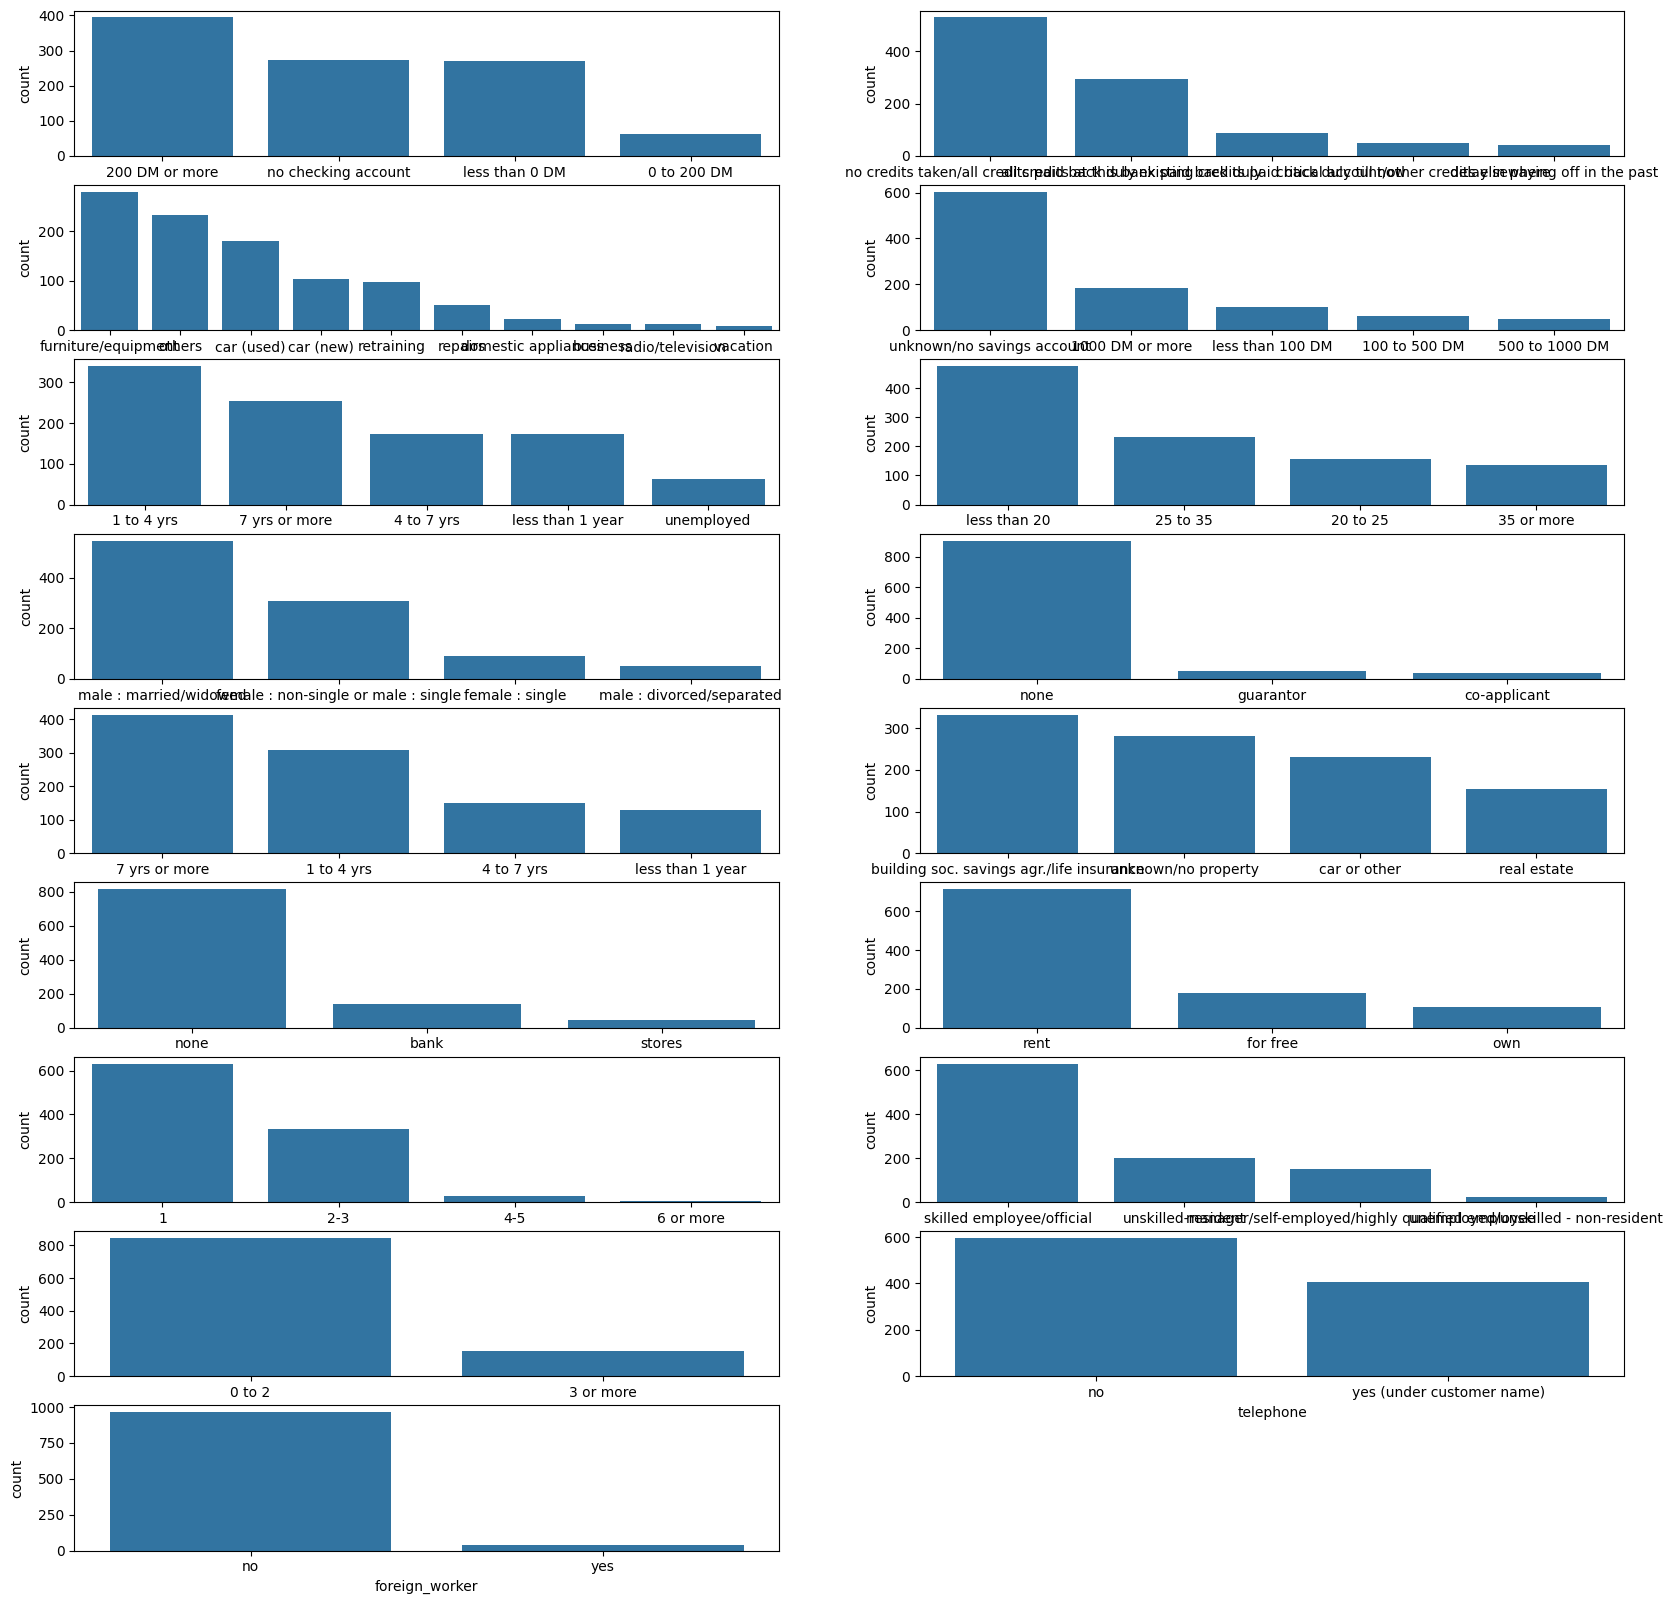

In [ ]:
plt.figure(figsize=(20,20))
for idx,columns in enumerate(categorical_columns):
    #fig,ax=plt.subplots(figsize=(20,8))
    plt.subplot(9, 2, idx+1)
    sns.countplot(x=df[columns], order=df[columns].value_counts().index, data=df)


# Bivariate Analysis

# Bivariate analysis of Numerical columns

<Axes: >

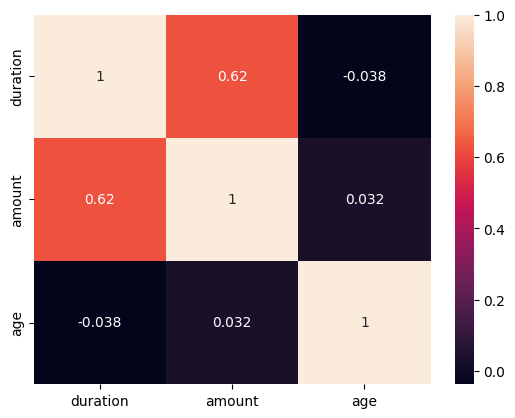

In [ ]:
#numerical_columns = ['duration','amount','age']
sns.heatmap(df[numerical_columns].corr(), annot=True)

High correlation: duration and amount

All others have no correlation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(df[numerical_columns].values, i ) for i in range(df[numerical_columns].shape[1])]
pd.DataFrame(vf, index=numerical_columns, columns= ["vif"])

,vif
duration,5.532347
amount,3.862073
age,3.064870


# Applying Chi-Square Contingency Test on categorical features to check their significance

In [ ]:
from scipy.stats import chi2_contingency, ttest_ind
def contingency_table(feature):
    p = pd.crosstab(df['credit_risk'],df[feature])
    return(p)
feature = []
pval = []
chi2_result = []

for i in categorical_columns[:-1]:
    feature.append(i)
    result = chi2_contingency(contingency_table(i))
    pval.append(round(float(result[1]),6))

    if float(result[1]) < 0.05:
        chi2_result.append("Significant")
    else:
        chi2_result.append("Insignificant")


In [ ]:
chisquare = pd.DataFrame(data={'PValue':pval,'Result':chi2_result},index=feature)
chisquare

,PValue,Result
status,0.000000,Significant
credit_history,0.000000,Significant
purpose,0.000116,Significant
savings,0.000000,Significant
employment_duration,0.001045,Significant
installment_rate,0.140033,Insignificant
personal_status_sex,0.022238,Significant
other_debtors,0.036056,Significant
present_residence,0.861552,Insignificant
property,0.000029,Significant


Converting the columns having ordinal values to numerical codes.

In [ ]:
status = {'no checking account':1, 'less than 0 DM':2, '0 to 200 DM':3, '200 DM or more':4}
df['status'] = df['status'].map(status)

savings = {'unknown/no savings account':1, 'less than 100 DM':2, '100 to 1000 DM':3, '1000 DM or more':4}
df['savings'] = df['savings'].map(savings)

employment_duration = {'unemployed':1 ,'less than 1 year':2, '1 to 4 yrs':3, '4 to 7 yrs':4, '7 yrs or more':5}
df['employment_duration'] = df['employment_duration'].map(employment_duration)

installment_rate = {'less than 20':1, '20 to 25':2, '25 to 35':3, '35 or more':4}
df['installment_rate'] = df['installment_rate'].map(installment_rate)

present_residence = {'less than 1 year':1, '1 to 4 yrs':2, '4 to 7 yrs':3, '7 yrs or more':4}
df['present_residence'] = df['present_residence'].map(present_residence)

number_credits = {'1':1, '2-3':2, '4 or more':3}
df['number_credits'] = df['number_credits'].map(number_credits)

people_liable = {'0 to 2':1, '3 or more':2}
df['people_liable'] = df['people_liable'].map(people_liable)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   1000 non-null   int64  
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   amount                   1000 non-null   int64  
 5   savings                  889 non-null    float64
 6   employment_duration      1000 non-null   int64  
 7   installment_rate         1000 non-null   int64  
 8   personal_status_sex      1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   int64  
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   int64  
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

In [ ]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,all credits at this bank paid back duly,car (used),1049,1.0,2,1,female : non-single or male : single,none,...,car or other,21,none,for free,1.0,skilled employee/official,1,no,no,1
1,1,9,all credits at this bank paid back duly,others,2799,1.0,3,3,male : married/widowed,none,...,unknown/no property,36,none,for free,2.0,skilled employee/official,2,no,no,1
2,2,12,no credits taken/all credits paid back duly,retraining,841,2.0,4,3,female : non-single or male : single,none,...,unknown/no property,23,none,for free,1.0,unskilled-resident,1,no,no,1
3,1,12,all credits at this bank paid back duly,others,2122,1.0,3,2,male : married/widowed,none,...,unknown/no property,39,none,for free,2.0,unskilled-resident,2,no,yes,1
4,1,12,all credits at this bank paid back duly,others,2171,1.0,3,1,male : married/widowed,none,...,car or other,38,bank,rent,2.0,unskilled-resident,1,no,yes,1


In [ ]:
df2 = df.drop(columns = chisquare[chisquare['Result'] == 'Insignificant'].index, axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   1000 non-null   int64  
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   amount                   1000 non-null   int64  
 5   savings                  889 non-null    float64
 6   employment_duration      1000 non-null   int64  
 7   personal_status_sex      1000 non-null   object 
 8   other_debtors            1000 non-null   object 
 9   property                 1000 non-null   object 
 10  age                      1000 non-null   int64  
 11  other_installment_plans  1000 non-null   object 
 12  housing                  1000 non-null   object 
 13  foreign_worker           1000 non-null   object 
 14  credit_risk              

In [ ]:
df2.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,personal_status_sex,other_debtors,property,age,other_installment_plans,housing,foreign_worker,credit_risk
0,1,18,all credits at this bank paid back duly,car (used),1049,1.0,2,female : non-single or male : single,none,car or other,21,none,for free,no,1
1,1,9,all credits at this bank paid back duly,others,2799,1.0,3,male : married/widowed,none,unknown/no property,36,none,for free,no,1
2,2,12,no credits taken/all credits paid back duly,retraining,841,2.0,4,female : non-single or male : single,none,unknown/no property,23,none,for free,no,1
3,1,12,all credits at this bank paid back duly,others,2122,1.0,3,male : married/widowed,none,unknown/no property,39,none,for free,yes,1
4,1,12,all credits at this bank paid back duly,others,2171,1.0,3,male : married/widowed,none,car or other,38,bank,rent,yes,1


# Doing One hot encoding

In [ ]:
df3 = pd.get_dummies(df2, columns = df2.drop('credit_risk',axis=1).select_dtypes(include='object').columns, drop_first=True)
df3.head()

,status,duration,amount,savings,employment_duration,age,credit_risk,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,...,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown/no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,foreign_worker_yes
0,1,18,1049,1.0,2,21,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,1,9,2799,1.0,3,36,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2,12,841,2.0,4,23,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1,12,2122,1.0,3,39,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4,1,12,2171,1.0,3,38,1,0,0,0,...,0,1,1,0,0,0,0,0,1,1


In [ ]:
df3.columns.drop("savings")

Index(['status', 'duration', 'amount', 'employment_duration', 'age',
       'credit_risk',
       'credit_history_critical account/other credits elsewhere',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_furniture/equipment',
       'purpose_others', 'purpose_radio/television', 'purpose_repairs',
       'purpose_retraining', 'purpose_vacation',
       'personal_status_sex_female : single',
       'personal_status_sex_male : divorced/separated',
       'personal_status_sex_male : married/widowed', 'other_debtors_guarantor',
       'other_debtors_none', 'property_car or other', 'property_real estate',
       'property_unknown/no property', 'other_installment_plans_none',
       'other_installment_plans_stores', 'housing_own', 'housing_rent',
       '

In [ ]:
df3[df3.columns.drop("savings")].to_csv("Clean_data.csv")

##model selection

In [ ]:
# importing libraries needed
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
clean_df=pd.read_csv('Clean_data.csv')

In [ ]:
clean_df.isna().sum()

Unnamed: 0                                                    0
status                                                        0
duration                                                      0
amount                                                        0
employment_duration                                           0
age                                                           0
credit_risk                                                   0
credit_history_critical account/other credits elsewhere       0
credit_history_delay in paying off in the past                0
credit_history_existing credits paid back duly till now       0
credit_history_no credits taken/all credits paid back duly    0
purpose_car (new)                                             0
purpose_car (used)                                            0
purpose_domestic appliances                                   0
purpose_furniture/equipment                                   0
purpose_others                          

In [ ]:
X=clean_df.drop(columns='credit_risk')
Y=clean_df['credit_risk']

In [ ]:
#splinting the data training and testing
train,train_val,test,test_val=train_test_split(X,Y,test_size=0.4,random_state=7)
X_train,X_test,Y_train,Y_test=train_test_split(train,test,test_size=0.2,random_state=3)

In [ ]:
#using Knn as base model
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,Y_test)

0.9

In [ ]:
#using svm as 2nd base model
svm=SVC()
svm.fit(X_train,Y_train)

SVC()

In [ ]:
svm.score(X_test,Y_test)

0.8416666666666667

In [ ]:
#Now prdiciting the values using Svm and knn model
Pre_knn=knn.predict(train_val)
Pre_svm=svm.predict(train_val)
# stack of both base model predictions using numpy
Pre=np.column_stack((Pre_knn,Pre_svm))
predict_test1 = knn.predict(X_test)
predict_test2 = svm.predict(X_test)
predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0,

In [ ]:
#Randomforest as final Model
random= RandomForestClassifier ()
random.fit(Pre,test_val)

RandomForestClassifier()

In [ ]:
random.score(predict_test,Y_test)

0.8916666666666667

In [ ]:
print('Parameters of random forest:\n')
print(random.get_params())

Parameters of random forest:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
#Using Random Hyperparameter Grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(Pre,test_val)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 208, 216, 225,
                                                         233, 241, 250, 258,
                                                         266, 275, 283, 291,
                                                         300, 308, 316, 325,
                                                         333, 341, 350, 358,
                                                         366, 375, 383, 391,
                                                         400]},
                   random_state=42, verbose=2)

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
x=rf_random.score(predict_test,Y_test)
print("The final Score of the Model with Random hyperparameter grid is ", x )

The final Score of the Model with Random hyperparameter grid is  0.8916666666666667
